In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [10]:
waste = pd.read_csv("C:/Users/Uche Buzz/Desktop/SAS Curiosity Cup/Datasets/FOOD_WASTE_csvformat.csv")
pd.set_option('display.max_columns', None)

In [11]:
years = [2011, 2010, 2004, 2007, 2008, 2009, 2012, 2000, 2001, 2002, 2003, 
         2005, 2006, 2013, 1995, 1996, 1993, 1994, 1997, 1998, 1999]

# Filter the DataFrame to include only rows with 'TIME' values between 2010 and 2011
ff_waste = waste[waste['TIME'].between(2000, 2011)]

# Display the resulting DataFrame
ff_waste


,LOCATION,Country,CAT,Category,ACT,Activity,UNIT,Unit,VAR,Variable,SRC,Source,TIME,Time,Value,Flag Codes,Flags
0,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,TONNES,tonnes,FWVAR511,Unnecessary edible food waste (e.),SOURCE22,CONCITO,2011,2011,1.100000e+05,NaN,NaN
1,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,TONNES,tonnes,FWVAR308DNK,Food Waste - Non-edible,SOURCE22,CONCITO,2011,2011,5.410000e+05,NaN,NaN
2,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,KGBYCAPITA,kg/capita,FWVAR511,Unnecessary edible food waste (e.),SOURCE22,CONCITO,2011,2011,1.974600e+01,NaN,NaN
3,NLD,Netherlands,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,PCT,%,FWVAR138,Food Loss & Waste (Min e.),SOURCE53,LNV 2010,2010,2010,1.000000e+01,NaN,NaN
4,NLD,Netherlands,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,PCT,%,FWVAR147NET,Food Loss & Waste in value of food production,SOURCE97,WUR 2009,2004,2004,1.250000e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,CHN,China (People's Republic of),FLFW,1. Food loss - Food waste,COMBINEDPOST-PRODUCTIONANDPRE,Combined : Post-production and Pre-consumption,TONNES,tonnes,FWVAR347,Food Waste - Starchy Roots,SOURCE31,FAO - Food balance sheets 2009,2009,2009,7.724000e+06,NaN,NaN
3075,CHN,China (People's Republic of),FLFW,1. Food loss - Food waste,COMBINEDPOST-PRODUCTIONANDPRE,Combined : Post-production and Pre-consumption,TONNES,tonnes,FWVAR348,Food Waste - Stimulants,SOURCE31,FAO - Food balance sheets 2009,2009,2009,4.100000e+04,NaN,NaN
3076,CHN,China (People's Republic of),FLFW,1. Food loss - Food waste,COMBINEDPOST-PRODUCTIONANDPRE,Combined : Post-production and Pre-consumption,TONNES,tonnes,FWVAR355,Food Waste - Treenuts,SOURCE31,FAO - Food balance sheets 2009,2009,2009,5.500000e+04,NaN,NaN
3077,CHN,China (People's Republic of),FLFW,1. Food loss - Food waste,COMBINEDPOST-PRODUCTIONANDPRE,Combined : Post-production and Pre-consumption,TONNES,tonnes,FWVAR357,Food Waste - Vegetable Oils,SOURCE31,FAO - Food balance sheets 2009,2009,2009,1.330000e+05,NaN,NaN


In [12]:
ff_waste.drop(['Flag Codes','Flags'], axis=1,  inplace=True)

C:\Users\Uche Buzz\AppData\Local\Temp\ipykernel_13280\2055983388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_waste.drop(['Flag Codes','Flags'], axis=1,  inplace=True)


In [13]:
ff_waste.isnull().sum()

LOCATION    0
Country     0
CAT         0
Category    0
ACT         0
Activity    0
UNIT        0
Unit        0
VAR         0
Variable    0
SRC         0
Source      0
TIME        0
Time        0
Value       0
dtype: int64

### importing second dataset

In [17]:
kagl = pd.read_csv('C:/Users/Uche Buzz/Desktop/SAS Curiosity Cup/Datasets/Countries.csv')
pd.set_option('display.max_columns', None)

In [18]:
kagl

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,R&D,Service (% GDP),Unemployment,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,20.494909,6.124620,NaN,48.302753,8.054,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,20.494909,6.124620,NaN,48.302753,8.040,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,23.810127,6.124620,NaN,36.151155,8.186,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,22.710864,6.124620,NaN,37.444804,8.122,22645130.0,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,26.226790,6.124620,NaN,41.110895,8.053,23553551.0,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,Zimbabwe,ZWE,2018,7.319375,50.509980,19.039841,26.163973,3.415607e+10,4.670418,28.386297,31.037898,10.618866,NaN,55.984768,6.784,15052184.0,390760.0,Africa,8.936585e+09,9.695644e+09,6.503261e+09,1.595231e+09,-7.590586e+08,2269.177012,38.520278
5102,Zimbabwe,ZWE,2019,9.819262,54.469350,22.837985,27.163459,2.183223e+10,3.659765,25.524111,32.025947,255.304991,NaN,52.677299,7.370,15354608.0,390760.0,Africa,5.930390e+09,5.572484e+09,4.986042e+09,7.990086e+08,3.579063e+08,1421.868596,39.294216
5103,Zimbabwe,ZWE,2020,8.772859,49.833418,15.666611,25.917014,2.150970e+10,3.425581,28.733547,32.767517,557.201817,NaN,52.892574,7.898,15669666.0,390760.0,Africa,5.574672e+09,6.180499e+09,3.369841e+09,7.368322e+08,-6.058277e+08,1372.696674,40.100486
5104,Zimbabwe,ZWE,2021,8.849899,49.833418,22.837985,25.411446,2.837124e+10,6.704907,30.901234,28.805586,98.546105,NaN,56.639870,8.067,15993524.0,390760.0,Africa,7.209542e+09,8.767063e+09,6.479419e+09,1.902265e+09,-1.557521e+09,1773.920411,40.929276


In [19]:
# Filter the rows in ckaggle to include only countries existing in filtered_waste
ff_kagl = kagl[kagl['Country Code'].isin(ff_waste['LOCATION'])]

In [20]:
ff_kagl

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,R&D,Service (% GDP),Unemployment,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
253,Australia,AUS,2000,3.112843,80.657646,13.360160,19.405280,4.158450e+11,7.599617,21.561707,24.573819,4.457435,6.546398e+09,64.404525,6.280,19028802.0,7.741220e+06,Oceania,8.069588e+10,8.966328e+10,5.555755e+10,3.160262e+10,-8.967395e+09,21853.449993,2.458114
254,Australia,AUS,2001,3.499666,80.657646,13.548759,22.168183,3.793578e+11,7.682723,22.082173,23.653267,4.407135,7.646088e+09,64.201099,6.740,19274701.0,7.741220e+06,Oceania,8.409674e+10,8.377045e+10,5.139828e+10,2.914501e+10,3.262850e+08,19681.645033,2.489879
255,Australia,AUS,2002,3.946780,80.657646,13.548759,20.737956,3.955730e+11,7.878076,20.733724,23.622615,2.981575,6.916753e+09,63.998048,6.370,19495210.0,7.741220e+06,Oceania,8.203376e+10,8.201702e+10,5.359524e+10,3.116354e+10,1.674308e+07,20290.780419,2.518364
256,Australia,AUS,2003,2.888274,80.657646,13.548759,19.067042,4.674980e+11,7.882926,21.155260,24.052628,2.732596,9.422583e+09,64.314546,5.930,19720737.0,7.741220e+06,Oceania,8.913803e+10,9.890041e+10,6.334017e+10,3.685252e+10,-9.762376e+09,23705.907216,2.547497
257,Australia,AUS,2004,3.062690,80.657646,13.548759,17.171789,6.143264e+11,8.090034,19.857924,23.946180,2.343255,1.136197e+10,64.292050,5.390,19932722.0,7.741220e+06,Oceania,1.054908e+11,1.219925e+11,8.323360e+10,4.969921e+10,-1.650164e+10,30819.993487,2.574881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,United States,USA,2018,0.903901,83.573950,13.146180,12.360989,2.053306e+13,16.640944,15.249390,18.630898,2.442583,6.161601e+11,76.735539,3.900,326838199.0,9.831510e+06,North America,2.538089e+12,3.131166e+12,2.699313e+12,3.416894e+12,-5.930770e+11,62823.309438,33.243947
4872,United States,USA,2019,0.838813,83.996680,13.380550,11.872470,2.138098e+13,16.676474,14.579479,18.280428,1.812210,6.769409e+11,77.181114,3.670,328329953.0,9.831510e+06,North America,2.538450e+12,3.117235e+12,2.860892e+12,3.565593e+12,-5.787850e+11,65120.394663,33.395679
4873,United States,USA,2020,0.948847,83.668618,12.650000,10.202126,2.106047e+13,18.815826,13.181636,17.508428,1.233584,7.266243e+11,78.137486,8.050,331511512.0,9.831510e+06,North America,2.148616e+12,2.776115e+12,2.664150e+12,3.962702e+12,-6.274990e+11,63528.634303,33.719287
4874,United States,USA,2021,0.959567,83.668618,14.404180,10.892727,2.331508e+13,15.575834,14.588674,17.884653,4.697859,6.433434e+11,77.599210,5.350,332031554.0,9.755518e+06,North America,2.539648e+12,3.401361e+12,3.358346e+12,3.631518e+12,-8.617130e+11,70219.472454,34.035257


In [21]:
ff_kagl['Country Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'China', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea, Rep.',
       'Luxembourg', 'Mexico', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Turkiye', 'United Kingdom', 'United States'], dtype=object)

In [22]:
ff_waste['Country'].unique()

array(['Denmark', 'Netherlands', 'Türkiye', 'Austria', 'Czechia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Luxembourg', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'United Kingdom', 'Estonia',
       'Japan', 'Belgium', 'United States', 'Canada', 'Korea',
       "China (People's Republic of)", 'Australia', 'Mexico', 'Slovenia'],
      dtype=object)

In [23]:
locations_waste = set(ff_waste['LOCATION'].unique())
country_codes_kaggle = set(ff_kagl['Country Code'].unique())

# Check if all locations in ff_waste are present in country_codes_kaggle
all_locations_in_kaggle = all(location in country_codes_kaggle for location in locations_waste)

# Check if all country codes in country_codes_kaggle are present in ff_waste
all_country_codes_in_waste = all(code in locations_waste for code in country_codes_kaggle)

# Print the results
print("All locations in ff_waste are present in country_codes_kaggle:", all_locations_in_kaggle)
print("All country codes in country_codes_kaggle are present in ff_waste:", all_country_codes_in_waste)


All locations in ff_waste are present in country_codes_kaggle: True
All country codes in country_codes_kaggle are present in ff_waste: True


In [24]:
# Merge DataFrames based on 'LOCATION' and 'TIME'
leftjoin = pd.merge(ff_kagl, ff_waste, how='left', left_on=['Country Code', 'Year'], right_on=['LOCATION', 'TIME'], suffixes=('_ckaggle', ''))

# Display the final merged DataFrame
pd.set_option("display.max_columns", None)



In [25]:
leftjoin

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,R&D,Service (% GDP),Unemployment,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density,LOCATION,Country,CAT,Category,ACT,Activity,UNIT,Unit,VAR,Variable,SRC,Source,TIME,Time,Value
0,Australia,AUS,2000,3.112843,80.657646,13.360160,19.405280,4.158450e+11,7.599617,21.561707,24.573819,4.457435,6.546398e+09,64.404525,6.280,19028802.0,7.741220e+06,Oceania,8.069588e+10,8.966328e+10,5.555755e+10,3.160262e+10,-8.967395e+09,21853.449993,2.458114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,AUS,2001,3.499666,80.657646,13.548759,22.168183,3.793578e+11,7.682723,22.082173,23.653267,4.407135,7.646088e+09,64.201099,6.740,19274701.0,7.741220e+06,Oceania,8.409674e+10,8.377045e+10,5.139828e+10,2.914501e+10,3.262850e+08,19681.645033,2.489879,AUS,Australia,WIG,2. Waste in general,CONTEXTUALDATA,Contextual data,TONNES,tonnes,FWVAR536AUS,Waste disposed of to landfill in Queensland,SOURCE83,TEC 2007,2001.0,2001.0,3610000.0
2,Australia,AUS,2001,3.499666,80.657646,13.548759,22.168183,3.793578e+11,7.682723,22.082173,23.653267,4.407135,7.646088e+09,64.201099,6.740,19274701.0,7.741220e+06,Oceania,8.409674e+10,8.377045e+10,5.139828e+10,2.914501e+10,3.262850e+08,19681.645033,2.489879,AUS,Australia,WIG,2. Waste in general,CONTEXTUALDATA,Contextual data,TONNES,tonnes,FWVAR537AUS,Waste generated in Queensland,SOURCE83,TEC 2007,2001.0,2001.0,4198000.0
3,Australia,AUS,2002,3.946780,80.657646,13.548759,20.737956,3.955730e+11,7.878076,20.733724,23.622615,2.981575,6.916753e+09,63.998048,6.370,19495210.0,7.741220e+06,Oceania,8.203376e+10,8.201702e+10,5.359524e+10,3.116354e+10,1.674308e+07,20290.780419,2.518364,AUS,Australia,WIG,2. Waste in general,HOUSEHOLDS,Households,TONNES,tonnes,FWVAR486AUS,Total green and organic Waste in Queensland,SOURCE83,TEC 2007,2002.0,2002.0,630000.0
4,Australia,AUS,2002,3.946780,80.657646,13.548759,20.737956,3.955730e+11,7.878076,20.733724,23.622615,2.981575,6.916753e+09,63.998048,6.370,19495210.0,7.741220e+06,Oceania,8.203376e+10,8.201702e+10,5.359524e+10,3.116354e+10,1.674308e+07,20290.780419,2.518364,AUS,Australia,WIG,2. Waste in general,HOUSEHOLDS,Households,TONNES,tonnes,FWVAR409AUS,Green and organic Waste disposed of to landfil...,SOURCE83,TEC 2007,2002.0,2002.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,United States,USA,2018,0.903901,83.573950,13.146180,12.360989,2.053306e+13,16.640944,15.249390,18.630898,2.442583,6.161601e+11,76.735539,3.900,326838199.0,9.831510e+06,North America,2.538089e+12,3.131166e+12,2.699313e+12,3.416894e+12,-5.930770e+11,62823.309438,33.243947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3535,United States,USA,2019,0.838813,83.996680,13.380550,11.872470,2.138098e+13,16.676474,14.579479,18.280428,1.812210,6.769409e+11,77.181114,3.670,328329953.0,9.831510e+06,North America,2.538450e+12,3.117235e+12,2.860892e+12,3.565593e+12,-5.787850e+11,65120.394663,33.395679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3536,United States,USA,2020,0.948847,83.668618,12.650000,10.202126,2.106047e+13,18.815826,13.181636,17.508428,1.233584,7.266243e+11,78.137486,8.050,331511512.0,9.831510e+06,North America,2.148616e+12,2.776115e+12,2.664150e+12,3.962702e+12,-6.274990e+11,63528.634303,33.719287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3537,United States,USA,2021,0.959567,83.668618,14.404180,10.892727,2.331508e+13,15.575834,14.588674,17.884653,4.697859,6.433434e+11,77.599210,5.350,332031554.0,9.755518e+06,North America,2.539648e+12,3.401361e+12,3.358346e+12,3.631518e+12,-8.617130e+11,70219.472454,34.035257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [26]:
#leftjoin.to_csv('leftjoin.csv', index=False)

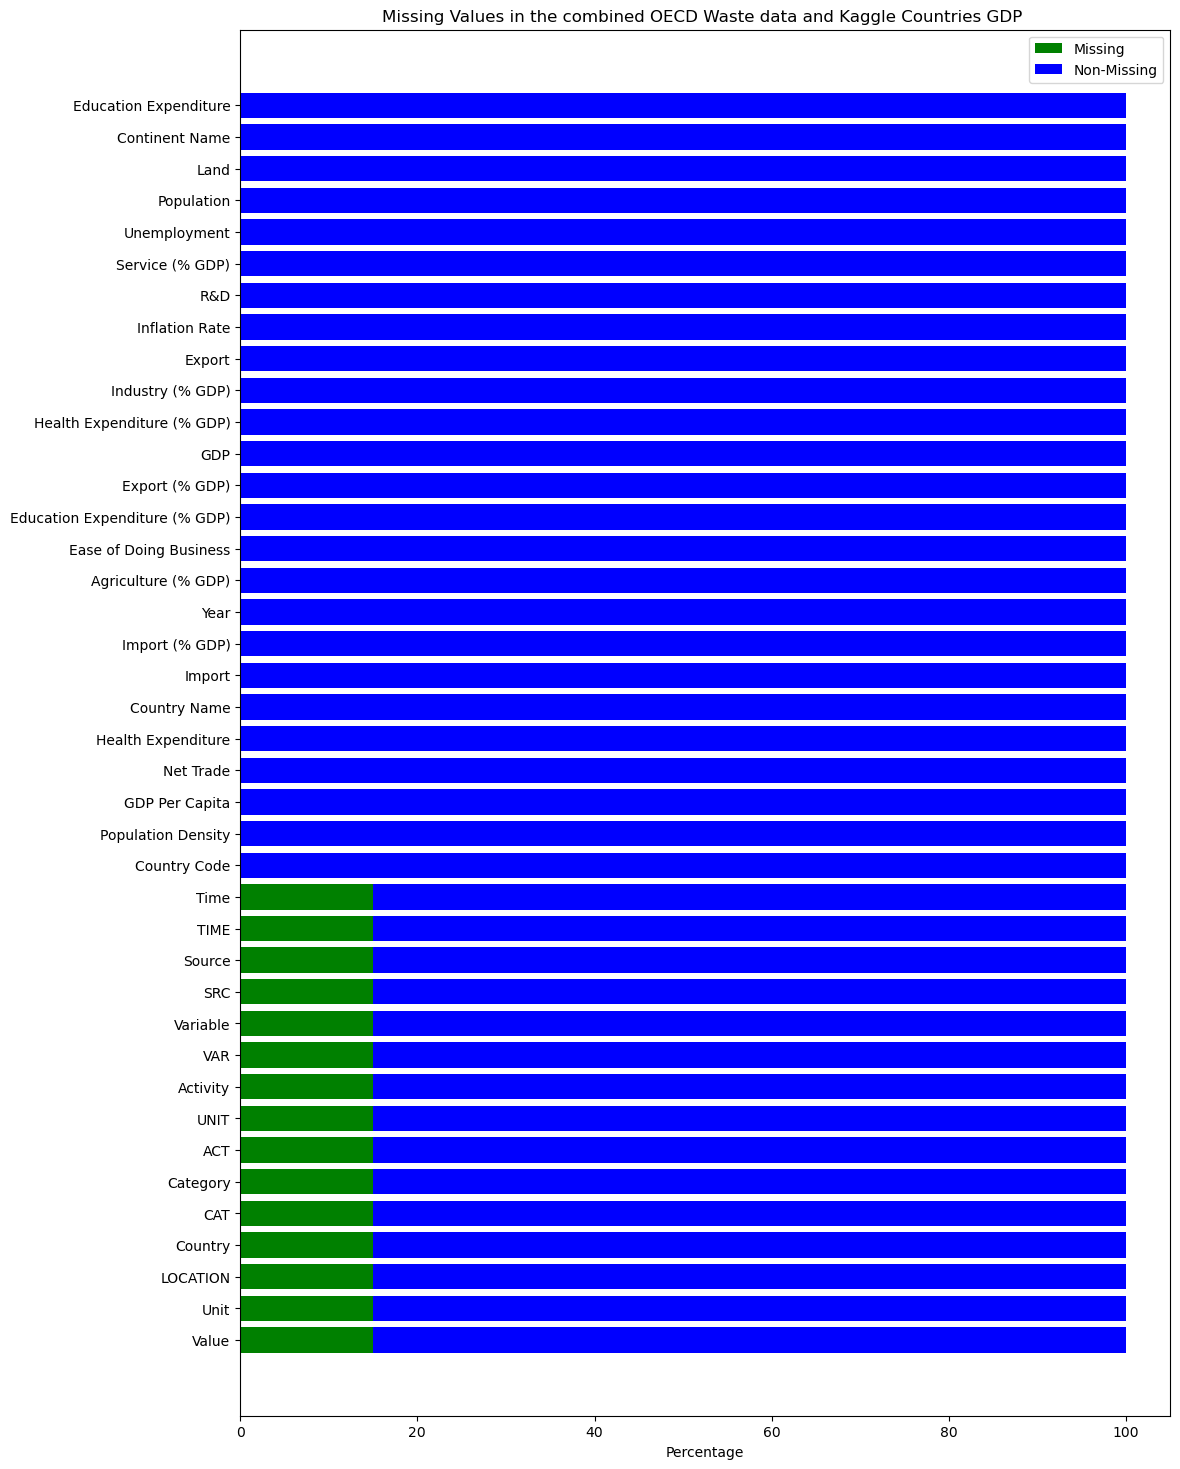

In [27]:

missing_percentage = (leftjoin.isnull().mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(12, 18))

# Plotting the percentage of missing values (green)
plt.barh(missing_percentage.index, missing_percentage, color='green', label='Missing')

# Plotting the percentage of non-missing values (blue)
plt.barh(missing_percentage.index, 100 - missing_percentage, left=missing_percentage, color='blue', label='Non-Missing')

plt.xlabel('Percentage')
plt.title("Missing Values in the combined OECD Waste data and Kaggle Countries GDP ")
plt.legend()
plt.show()

In [28]:
leftjoin.drop(['Time', 'SRC', 'VAR', 'ACT', 'CAT'], axis=1, inplace=True)

In [29]:
leftjoin

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,R&D,Service (% GDP),Unemployment,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density,LOCATION,Country,Category,Activity,UNIT,Unit,Variable,Source,TIME,Value
0,Australia,AUS,2000,3.112843,80.657646,13.360160,19.405280,4.158450e+11,7.599617,21.561707,24.573819,4.457435,6.546398e+09,64.404525,6.280,19028802.0,7.741220e+06,Oceania,8.069588e+10,8.966328e+10,5.555755e+10,3.160262e+10,-8.967395e+09,21853.449993,2.458114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,AUS,2001,3.499666,80.657646,13.548759,22.168183,3.793578e+11,7.682723,22.082173,23.653267,4.407135,7.646088e+09,64.201099,6.740,19274701.0,7.741220e+06,Oceania,8.409674e+10,8.377045e+10,5.139828e+10,2.914501e+10,3.262850e+08,19681.645033,2.489879,AUS,Australia,2. Waste in general,Contextual data,TONNES,tonnes,Waste disposed of to landfill in Queensland,TEC 2007,2001.0,3610000.0
2,Australia,AUS,2001,3.499666,80.657646,13.548759,22.168183,3.793578e+11,7.682723,22.082173,23.653267,4.407135,7.646088e+09,64.201099,6.740,19274701.0,7.741220e+06,Oceania,8.409674e+10,8.377045e+10,5.139828e+10,2.914501e+10,3.262850e+08,19681.645033,2.489879,AUS,Australia,2. Waste in general,Contextual data,TONNES,tonnes,Waste generated in Queensland,TEC 2007,2001.0,4198000.0
3,Australia,AUS,2002,3.946780,80.657646,13.548759,20.737956,3.955730e+11,7.878076,20.733724,23.622615,2.981575,6.916753e+09,63.998048,6.370,19495210.0,7.741220e+06,Oceania,8.203376e+10,8.201702e+10,5.359524e+10,3.116354e+10,1.674308e+07,20290.780419,2.518364,AUS,Australia,2. Waste in general,Households,TONNES,tonnes,Total green and organic Waste in Queensland,TEC 2007,2002.0,630000.0
4,Australia,AUS,2002,3.946780,80.657646,13.548759,20.737956,3.955730e+11,7.878076,20.733724,23.622615,2.981575,6.916753e+09,63.998048,6.370,19495210.0,7.741220e+06,Oceania,8.203376e+10,8.201702e+10,5.359524e+10,3.116354e+10,1.674308e+07,20290.780419,2.518364,AUS,Australia,2. Waste in general,Households,TONNES,tonnes,Green and organic Waste disposed of to landfil...,TEC 2007,2002.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,United States,USA,2018,0.903901,83.573950,13.146180,12.360989,2.053306e+13,16.640944,15.249390,18.630898,2.442583,6.161601e+11,76.735539,3.900,326838199.0,9.831510e+06,North America,2.538089e+12,3.131166e+12,2.699313e+12,3.416894e+12,-5.930770e+11,62823.309438,33.243947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3535,United States,USA,2019,0.838813,83.996680,13.380550,11.872470,2.138098e+13,16.676474,14.579479,18.280428,1.812210,6.769409e+11,77.181114,3.670,328329953.0,9.831510e+06,North America,2.538450e+12,3.117235e+12,2.860892e+12,3.565593e+12,-5.787850e+11,65120.394663,33.395679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3536,United States,USA,2020,0.948847,83.668618,12.650000,10.202126,2.106047e+13,18.815826,13.181636,17.508428,1.233584,7.266243e+11,78.137486,8.050,331511512.0,9.831510e+06,North America,2.148616e+12,2.776115e+12,2.664150e+12,3.962702e+12,-6.274990e+11,63528.634303,33.719287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3537,United States,USA,2021,0.959567,83.668618,14.404180,10.892727,2.331508e+13,15.575834,14.588674,17.884653,4.697859,6.433434e+11,77.599210,5.350,332031554.0,9.755518e+06,North America,2.539648e+12,3.401361e+12,3.358346e+12,3.631518e+12,-8.617130e+11,70219.472454,34.035257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df = leftjoin.copy()

## first set of EDA

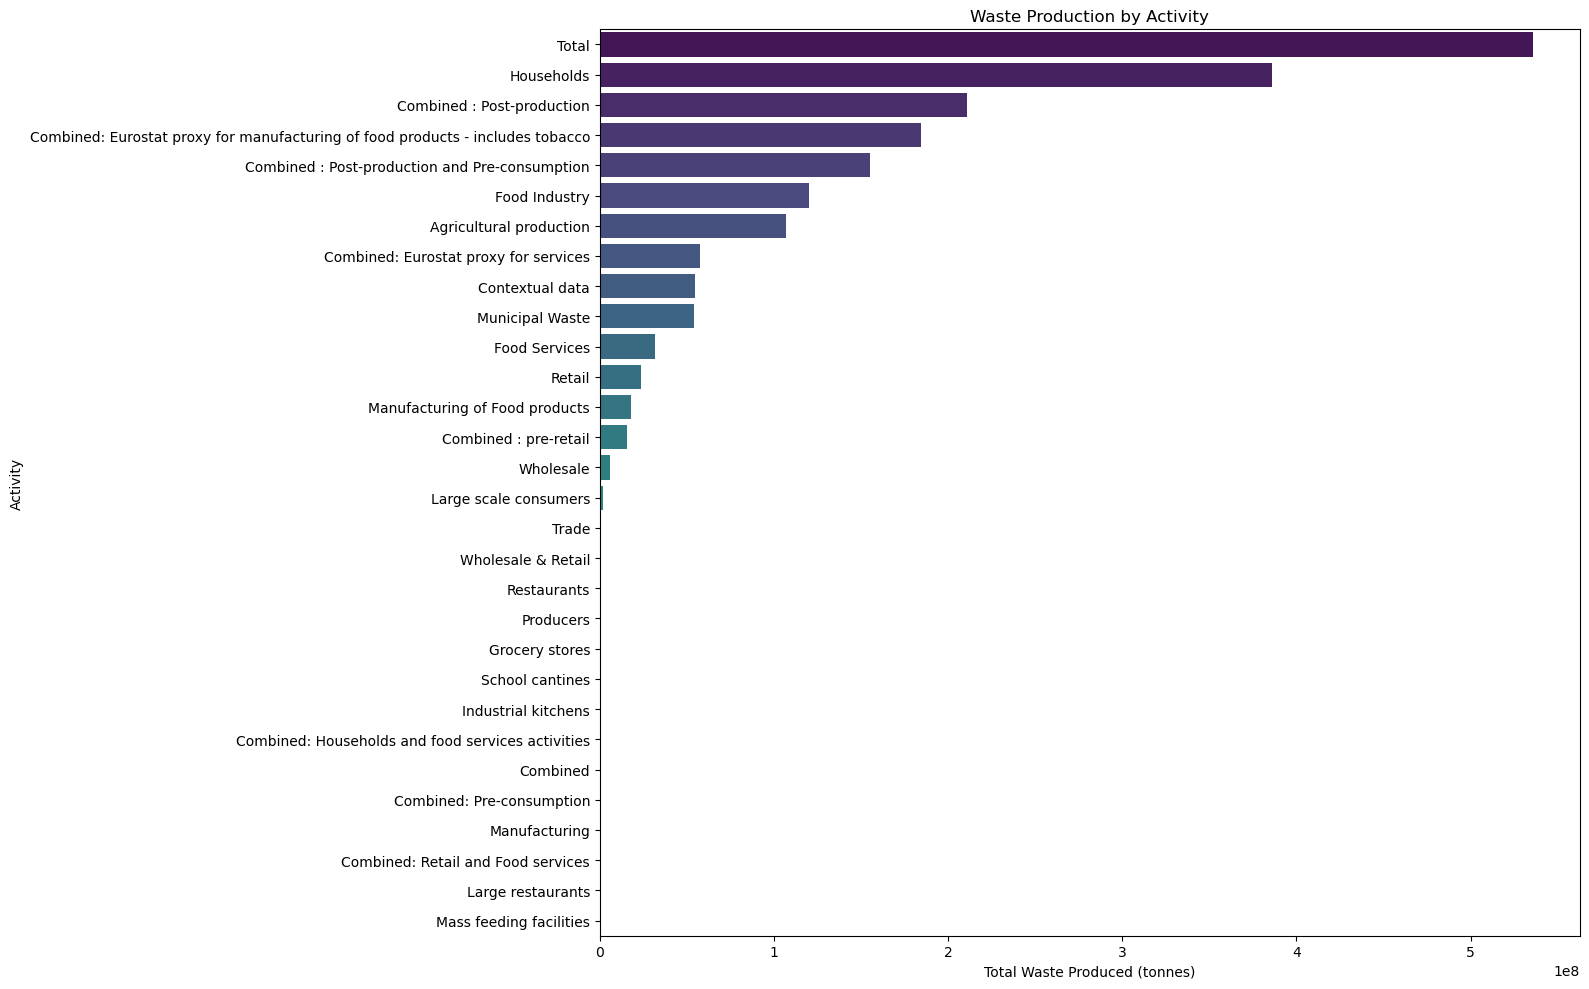

In [31]:

# Group by activity, summing up the waste produced in tonnes
activity_waste = df.groupby('Activity')['Value'].sum().reset_index()

# Sort the values to identify top activities easily
activity_waste = activity_waste.sort_values(by='Value', ascending=False)

# Create a larger bar graph
plt.figure(figsize=(16, 10))

# Create a bar plot
sns.barplot(x='Value', y='Activity', data=activity_waste, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced (tonnes)')
plt.ylabel('Activity')
plt.title('Waste Production by Activity')
plt.tight_layout()

# Show the plot
plt.show()


In [49]:

correlation_values = df.corr()['Value']

# Display the correlation values
print(correlation_values)


ValueError: could not convert string to float: 'Australia'

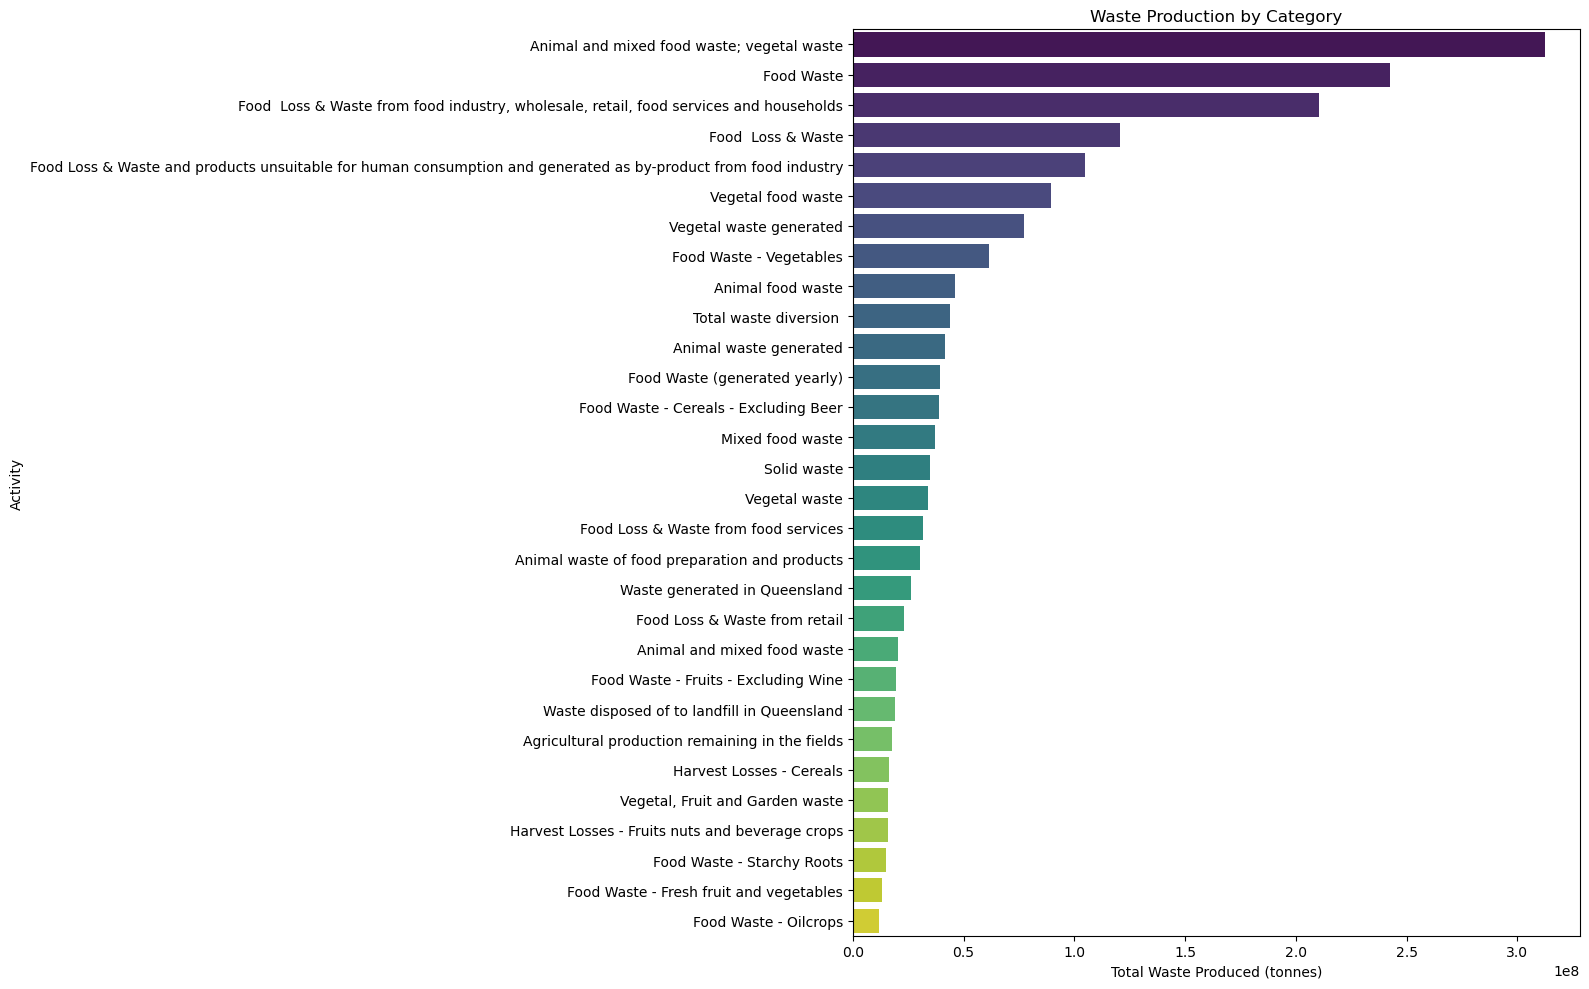

In [34]:
# Group by activity, summing up the waste produced in tonnes
var_waste = df.groupby('Variable')['Value'].sum().reset_index()

# Sort the values to identify top activities easily
var_waste = var_waste.sort_values(by='Value', ascending=False)

# Select the top 30 activities
top30 = var_waste.head(30)

# Create a larger bar graph
plt.figure(figsize=(16, 10))

# Create a bar plot
sns.barplot(x='Value', y='Variable', data=top30, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced (tonnes)')
plt.ylabel('Activity')
plt.title('Waste Production by Category')
plt.tight_layout()

# Show the plot
plt.show()


In [33]:
df['Variable'].nunique()

462

In [35]:
variable_counts = df["Variable"].value_counts()

variable_counts

Variable
Animal and mixed food waste; vegetal waste       600
Animal waste of food preparation and products    273
Food Waste                                       114
Animal and mixed food waste                       98
Vegetal waste                                     91
                                                ... 
Solid food considered food Loss                    1
Solid food purchased                               1
Solid food waste - Average weight                  1
Solid food waste - Maximum weight                  1
Food Waste - Drinks (Loures region)                1
Name: count, Length: 462, dtype: int64

In [ ]:
df['UNIT'].unique()

In [ ]:
df[df['UNIT']=='KGBYCAPITA']

In [ ]:
df[df['UNIT']=='TONNES']

In [ ]:
df[df['UNIT']=='PCT']

In [ ]:
df[df['UNIT']=='MILLIONLOCALCURRENCY']

In [ ]:
unit_counts = df['UNIT'].value_counts()
print(unit_counts)


In [ ]:
# # Filter rows where Unit is KGBYCAPITA
# mask = df['UNIT'] == 'KGBYCAPITA'

# # Multiply 'value' by 'population' and divide by 1000
# df.loc[mask, 'Value'] = df.loc[mask, 'Value'] * df.loc[mask, 'Population'] / 1000

# # Replace 'Unit' with 'TONNES' for rows where Unit was KGBYCAPITA
# df.loc[mask, 'UNIT'] = 'TONNES1'


In [ ]:
# unit_counts2 = df['UNIT'].value_counts()
# print(unit_counts2)


In [ ]:
# dd=df[df['UNIT'] == 'TONNES1']

# dd['Value'].unique()

## Which country with most waste 

In [36]:
# Group by country and summing up the waste produced in tonnes
total_waste_by_country = df.groupby('Country')['Value'].sum().reset_index()

# Sort the values to identify the country with the most waste
max_waste_country = total_waste_by_country.sort_values(by='Value', ascending=False).iloc[0]

# Display the country with the most waste
print(f"The country with the most waste is {max_waste_country['Country']} with {max_waste_country['Value']} tonnes.")


The country with the most waste is Japan with 499730171.1536585 tonnes.


In [37]:
total_waste_by_country 

,Country,Value
0,Australia,6.237596e+07
1,Austria,3.165822e+07
2,Belgium,1.690888e+07
3,Canada,7.162653e+07
4,China (People's Republic of),8.663411e+07
5,Czechia,4.736619e+06
6,Denmark,6.385120e+06
7,Estonia,1.680566e+06
8,Finland,4.817149e+06
9,France,2.568691e+07


In [38]:
# Group by unit, summing up the waste produced in tonnes for each country
total_waste_by_unit = df.groupby(['UNIT', 'Country'])['Value'].sum().reset_index()

# Find the country with the most waste for each unit
max_waste_by_unit = total_waste_by_unit.groupby('UNIT').apply(lambda x: x.loc[x['Value'].idxmax()]).reset_index(drop=True)

# Display the countries with the most waste for each unit
print(max_waste_by_unit)


                        UNIT         Country         Value
0            BILLIONCALORIES   United States  1.949500e+03
1      CALORIESBYCAPITABYDAY   United States  1.008700e+04
2                         KG       Australia  1.861800e+03
3                 KGBYCAPITA     Netherlands  6.479500e+03
4            KGBYCAPITABYDAY         Türkiye  6.376000e-01
5           KGBYCAPITABYWEEK          Mexico  2.080000e+00
6                    KGBYDAY          Mexico  8.460214e+04
7              KGBYHOUSEHOLD     Netherlands  9.110000e+02
8        KGBYHOUSEHOLDBYWEEK       Australia  3.089000e+01
9                   KGBYWEEK          Mexico  5.922150e+05
10         LITRESBYHOUSEHOLD       Australia  6.960000e+02
11             LOCALCURRENCY       Australia  5.645000e+03
12     LOCALCURRENCYBYCAPITA   United States  8.445800e+03
13  LOCALCURRENCYBYHOUSEHOLD       Australia  4.302000e+03
14                MILLIONEUR          Norway  2.500000e+03
15                 MILLIONKG   United States  6.479387e+

In [ ]:
total_waste_by_country

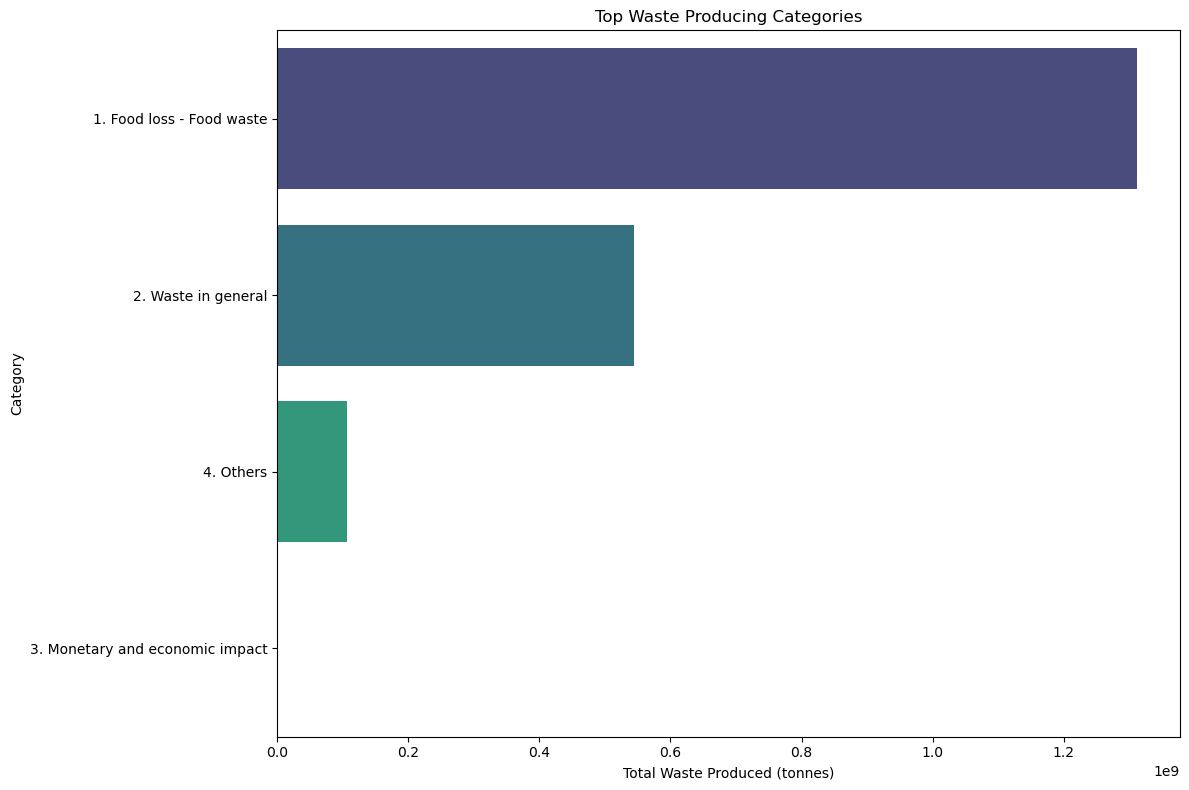

In [39]:
#The questions..

#1. What is the most prominent category of waste

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_waste' is your DataFrame
# Group by category and summing up the waste produced in tonnes
cat_waste = df.groupby('Category')['Value'].sum().reset_index()

# Sort the values to identify top categories easily
cat_waste = cat_waste.sort_values(by='Value', ascending=False)

# Select the top 10 categories (you can change this number as needed)
top_cat = cat_waste.head(10)

# Create a larger bar graph
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Value', y='Category', data=top_cat, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced (tonnes)')
plt.ylabel('Category')
plt.title('Top Waste Producing Categories')
plt.tight_layout()

# Show the plot
plt.show()

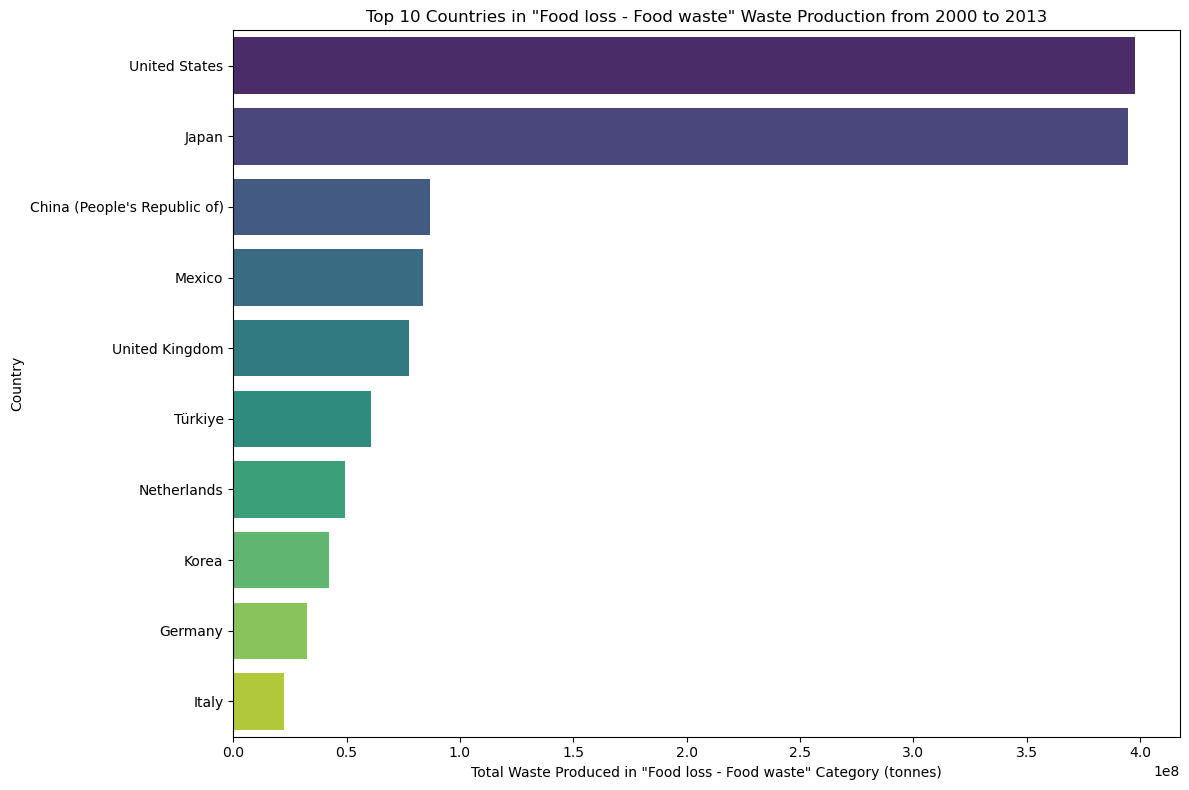

In [40]:
#1B - checking countries in the predominant category
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for the 'Food loss - Food waste' category
food_loss_waste = df[df['Category'] == '1. Food loss - Food waste']

# Group by country and summing up the waste produced in tonnes
by_country = food_loss_waste.groupby('Country')['Value'].sum().reset_index()

# Sort the values to identify top countries easily
by_country = by_country.sort_values(by='Value', ascending=False)

# Select the top 10 countries (you can change this number as needed)
top_countries = by_country.head(10)

# Create a larger bar graph
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Value', y='Country', data=top_countries, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced in "Food loss - Food waste" Category (tonnes)')
plt.ylabel('Country')
plt.title('Top 10 Countries in "Food loss - Food waste" Waste Production from 2000 to 2013')
plt.tight_layout()

# Show the plot
plt.show()

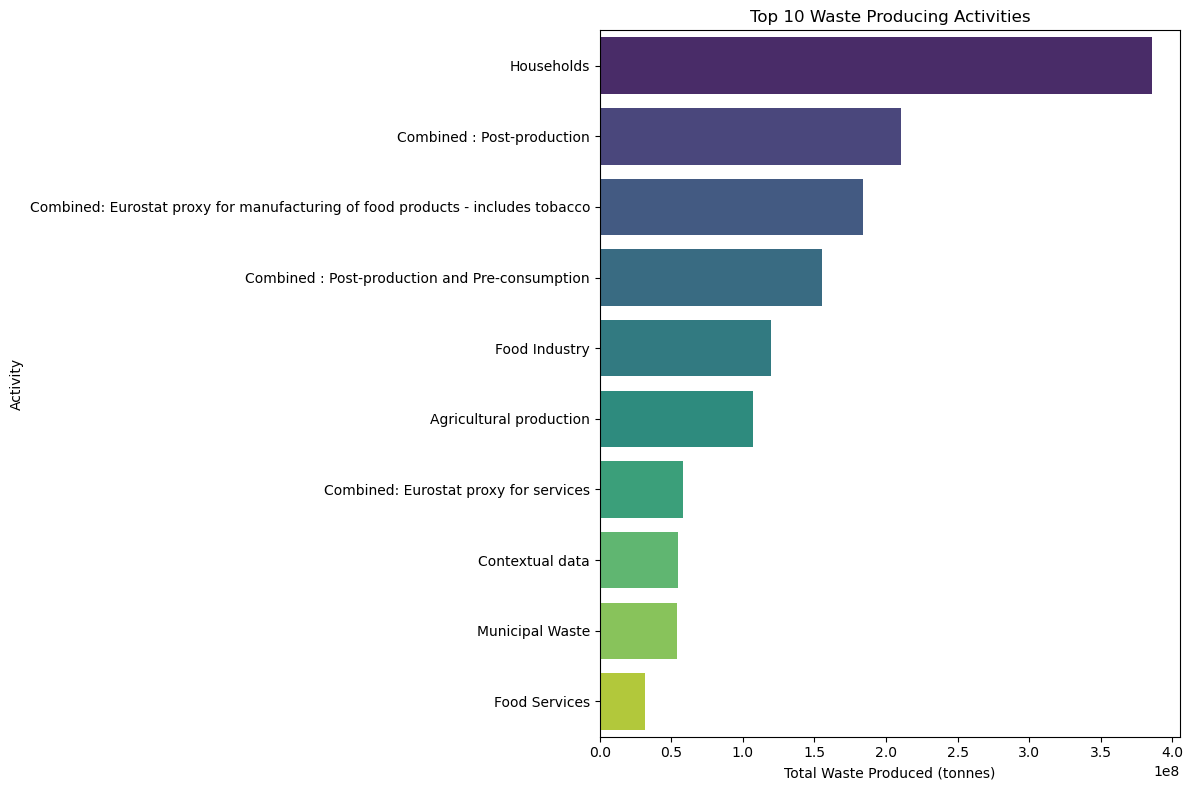

In [51]:
#1C most prominent waste activity

import matplotlib.pyplot as plt
import seaborn as sns


# Group by activity and summing up the waste produced in tonnes
#activity_waste = filtered_waste.groupby('Activity')['Value'].sum().reset_index()

activity_waste = df[df['Activity'] != 'Total'].groupby('Activity')['Value'].sum().reset_index()


# Sort the values to identify top activities easily
activity_waste = activity_waste.sort_values(by='Value', ascending=False)

# Select the top 10 activities (you can change this number as needed)
top_activities = activity_waste.head(10)

# Create a larger bar graph
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Value', y='Activity', data=top_activities, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced (tonnes)')
plt.ylabel('Activity')
plt.title('Top 10 Waste Producing Activities')
plt.tight_layout()

# Show the plot
plt.show()

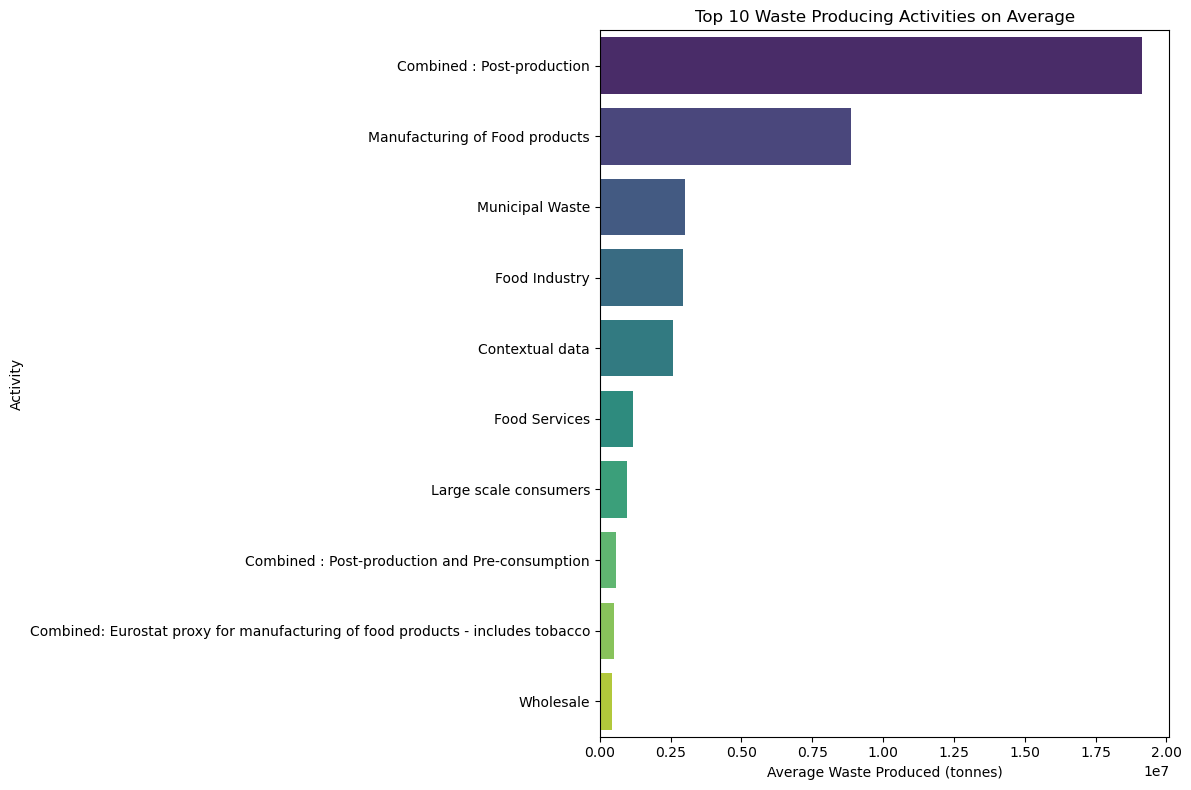

In [41]:
# 1Cii

import matplotlib.pyplot as plt
import seaborn as sns

# Group by activity and calculate the average waste produced in tonnes
activity_waste2 = df[df['Activity'] != 'Total'].groupby('Activity')['Value'].mean().reset_index()

# Sort the values to identify top activities easily
activity_waste2 = activity_waste2.sort_values(by='Value', ascending=False)

# Select the top 10 activities (you can change this number as needed)
top_activities2 = activity_waste2.head(10)

# Create a larger bar graph
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Value', y='Activity', data=top_activities2, palette='viridis')

# Customize the plot
plt.xlabel('Average Waste Produced (tonnes)')
plt.ylabel('Activity')
plt.title('Top 10 Waste Producing Activities on Average')
plt.tight_layout()

# Show the plot
plt.show()


In [52]:
top_activities_list = top_activities['Activity'].tolist()
top_activities_list

['Households',
 'Combined : Post-production',
 'Combined: Eurostat proxy for manufacturing of food products - includes tobacco',
 'Combined : Post-production and Pre-consumption',
 'Food Industry',
 'Agricultural production',
 'Combined: Eurostat proxy for services',
 'Contextual data',
 'Municipal Waste',
 'Food Services']

In [53]:
top_activities_df = df[df['Activity'].isin(top_activities_list)]
# top_activities_df.head(5)

In [54]:
sorted_activities = top_activities_df.groupby('Activity')['Value'].sum().sort_values(ascending=False).index
sorted_activities

Index(['Households', 'Combined : Post-production',
       'Combined: Eurostat proxy for manufacturing of food products - includes tobacco',
       'Combined : Post-production and Pre-consumption', 'Food Industry',
       'Agricultural production', 'Combined: Eurostat proxy for services',
       'Contextual data', 'Municipal Waste', 'Food Services'],
      dtype='object', name='Activity')

In [44]:
# # Selecting the top 10 activities
# top_activities_list = top_activities['Activity'].tolist()

# # Filtering the DataFrame for the top 10 activities
# top_activities_df = df[df['Activity'].isin(top_activities_list)]

# # Sort activities based on mean value in descending order
# sorted_activities = top_activities_df.groupby('Activity')['Value'].sum().sort_values(ascending=False).index

# # Create a sophisticated line plot
# plt.figure(figsize=(16, 10))
# sns.lineplot(x='Year', y='Value', hue='Activity', data=top_activities_df, ci='sd',
#              palette='viridis', linewidth=4, hue_order=sorted_activities)

# # Customize the plot
# plt.xlabel('Year')
# plt.ylabel('Total Waste Produced (tonnes)')
# plt.title('Time Trend of Top 10 Waste Producing Activities')
# plt.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left')
# plt.tight_layout()

# # Show the plot
# plt.show()


C:\Users\Uche Buzz\AppData\Local\Temp\ipykernel_13280\4275847029.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Year', y='Value', hue='Activity', data=top_activities_df, ci='sd',


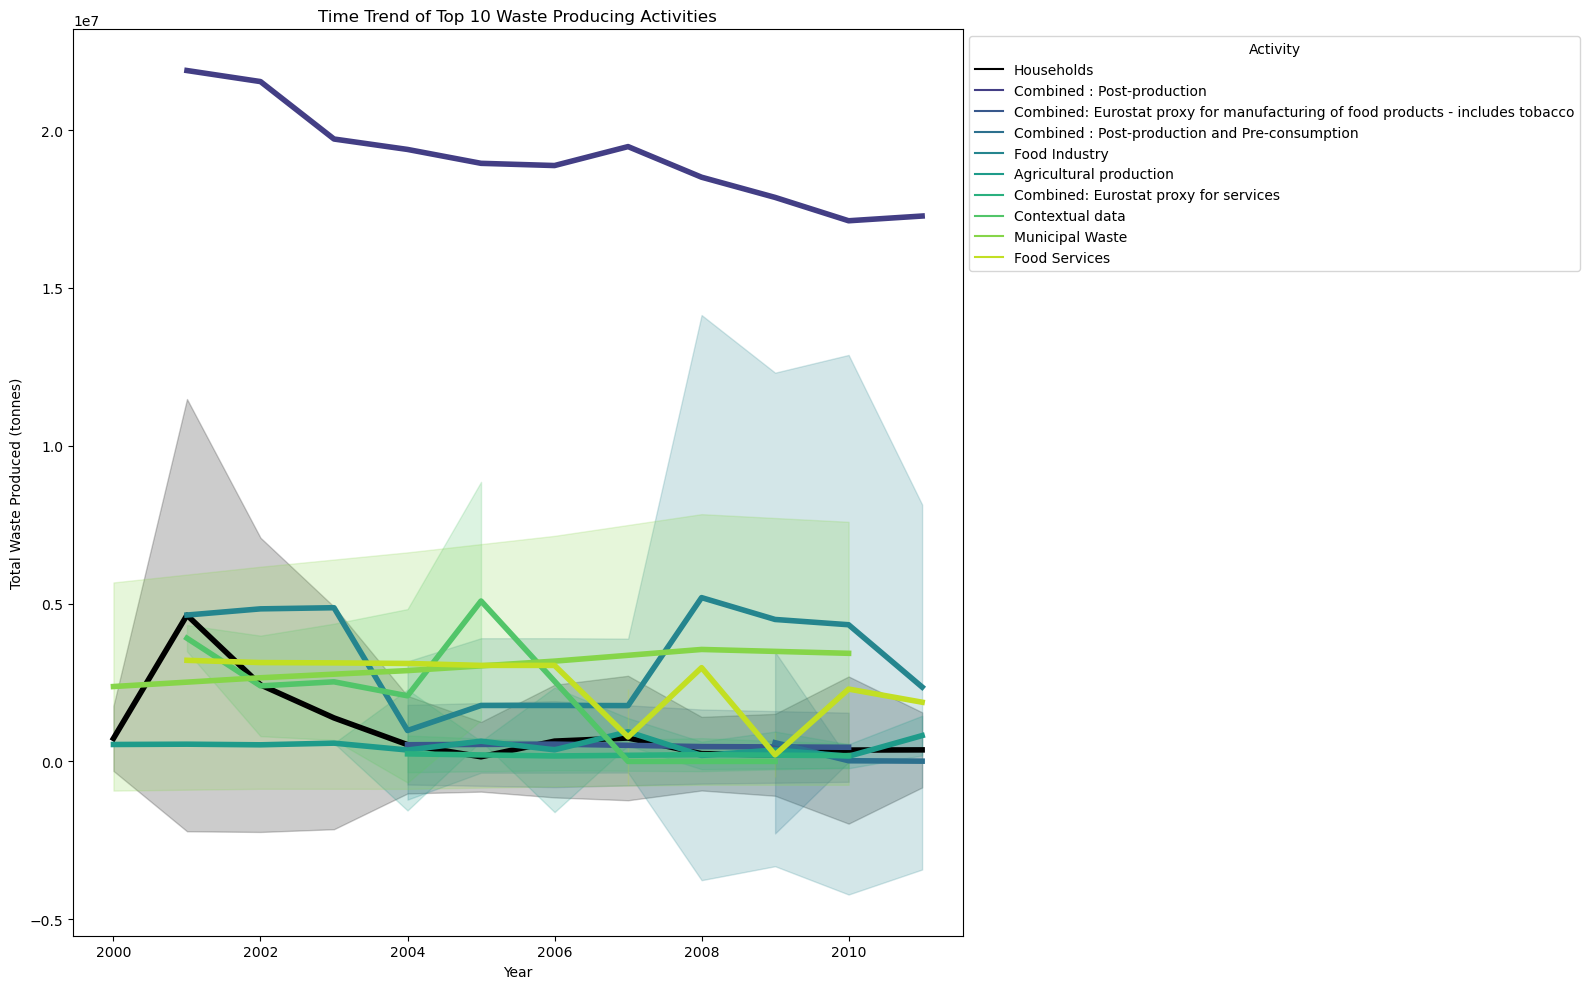

In [55]:
# Selecting the top 10 activities
top_activities_list = top_activities['Activity'].tolist()

# Filtering the DataFrame for the top 10 activities
top_activities_df = df[df['Activity'].isin(top_activities_list)]

# Sort activities based on mean value in descending order
sorted_activities = top_activities_df.groupby('Activity')['Value'].sum().sort_values(ascending=False).index

# Determine the largest activity
largest_activity = sorted_activities[0]

# Create a dictionary to map activities to colors
activity_colors = {activity: 'black' if activity == largest_activity else sns.color_palette('viridis', len(sorted_activities))[i] for i, activity in enumerate(sorted_activities)}

# Create a sophisticated line plot
plt.figure(figsize=(16, 10))
sns.lineplot(x='Year', y='Value', hue='Activity', data=top_activities_df, ci='sd',
             palette=activity_colors, linewidth=4, hue_order=sorted_activities)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total Waste Produced (tonnes)')
plt.title('Time Trend of Top 10 Waste Producing Activities')
plt.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Selecting the top 10 activities
# top_activities_list = top_activities['Activity'].tolist()

# # Filtering the DataFrame for the top 10 activities
# top_activities_df = df[df['Activity'].isin(top_activities_list)]

# # Create a sophisticated line plot
# plt.figure(figsize=(16, 10))
# sns.lineplot(x='Year', y='Value', hue='Activity', data=top_activities_df, ci='sd', palette='viridis', linewidth=2.5)

# # Customize the plot
# plt.xlabel('Year')
# plt.ylabel('Total Waste Produced (tonnes)')
# plt.title('Time Trend of Top 10 Waste Producing Activities ')
# plt.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left')
# plt.tight_layout()

# # Show the plot
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Selecting the top 10 activities
# top_activities_list2 = top_activities2['Activity'].tolist()

# # Filtering the DataFrame for the top 10 activities
# top_activities_df2 = df[df['Activity'].isin(top_activities_list2)]

# # Create a sophisticated line plot
# plt.figure(figsize=(16, 10))

# # Use a colorblind-friendly palette
# colors = sns.color_palette('colorblind', n_colors=len(top_activities_list2))

# sns.lineplot(x='Year', y='Value', hue='Activity', data=top_activities_df2, ci='sd', palette=colors, linewidth=5)

# # Customize the plot
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Total Waste Produced (tonnes)', fontsize=14)
# plt.title('Time Trend of Top 10 Waste Producing Activities on Average', fontsize=16)
# plt.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.tight_layout()

# # Show the plot
# plt.show()


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the top 10 activities
top_activities_list2 = top_activities2['Activity'].tolist()

# Filtering the DataFrame for the top 10 activities
top_activities_df2 = df[df['Activity'].isin(top_activities_list2)]

# Sort activities based on mean value in descending order
sorted_activities2 = top_activities_df2.groupby('Activity')['Value'].mean().sort_values(ascending=False).index

# Use a colorblind-friendly palette
colors = sns.color_palette('colorblind', n_colors=len(sorted_activities))

# Determine the largest activity
largest_activity2 = sorted_activities2[0]

# Create a dictionary to map activities to colors
activity_colors2 = {activity: 'black' if activity == largest_activity2 else 
                    sns.color_palette('colorblind', len(sorted_activities2))[i] for i, 
                    activity in enumerate(sorted_activities2)}

# Create a sophisticated line plot
plt.figure(figsize=(16, 10))
sns.lineplot(x='Year', y='Value', hue='Activity', 
             data=top_activities_df2, ci='sd', palette=activity_colors2, 
             linewidth=4, hue_order=sorted_activities2)

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Waste Produced (tonnes)', fontsize=14)
plt.title('Time Trend of Top 10 Waste Producing Activities on Average', fontsize=16)
plt.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'sorted_activities' is not defined

In [ ]:
largest_activity2

In [ ]:
top_activities_df2

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Group by activity and calculate the average waste produced in tonnes with confidence interval
# top_activities_df = df[df['Activity'].isin(top_activities['Activity'])]
# plt.figure(figsize=(16, 10))
# sns.lineplot(x='Year', y='Value', hue='Activity', data=top_activities_df, ci='sd', estimator='mean', palette='viridis', linewidth=2.5)

# # Customize the plot
# plt.xlabel('Year')
# plt.ylabel('Average Waste Produced (tonnes)')
# plt.title('Time Trend of Top 10 Waste Producing Activities')
# plt.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left')
# plt.tight_layout()

# # Show the plot
# plt.show()


In [ ]:
#1B - checking countries in the predominant Activity which is household
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for the 'Food loss - Food waste' category
household_waste = df[df['Activity'] == 'Households']

# Group by country and summing up the waste produced in tonnes
by_country2 = household_waste.groupby('Country')['Value'].sum().reset_index()

# Sort the values to identify top countries easily
by_country2 = by_country2.sort_values(by='Value', ascending=False)

# Select the top 10 countries (you can change this number as needed)
top_count = by_country2.head(10)

# Create a larger bar graph
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Value', y='Country', data=top_count, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced in "Households (tonnes)')
plt.ylabel('Country')
plt.title('Top 10 Countries in "Household food Waste "Production from 2000 to 2013')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#1B - checking countries in the predominant Activity which is household
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for the 'Food loss - Food waste' category
household_waste = df[df['Activity'] == 'Households']

# Group by country and summing up the waste produced in tonnes
by_country2 = household_waste.groupby('Country')['Value'].mean().reset_index()

# Sort the values to identify top countries easily
by_country2 = by_country2.sort_values(by='Value', ascending=False)

# Select the top 10 countries (you can change this number as needed)
top_count = by_country2.head(10)

# Create a larger bar graph
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Value', y='Country', data=top_count, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced in "Households (tonnes)')
plt.ylabel('Country')
plt.title('Top 10 Countries in "Household food Waste " Average Production from 2000 to 2013')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# plt.figure(figsize=(25,15)) # this assigns the size of our plot 
# sns.heatmap(df.corr(), annot = True) # here we use seaborn to plot our correlation and annoting it with the numbers
# plt.title('Correlation Matrix Heatmap', fontsize=20, fontweight='bold') # the title here 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter relevant columns for analysis
columns_of_interest = ['Year', 'Country Name', 'Activity', 'GDP', 'Health Expenditure (% GDP)', 'Unemployment', 'Population', 'Education Expenditure (% GDP)', 'Value']
filtered_df = df[columns_of_interest]

# Group by Activity and calculate total values
#total_values_by_activity = filtered_df[filtered_df['Activity']!= 'Total'].groupby('Activity')['Value'].sum().reset_index()
total_values_by_activity = filtered_df.groupby('Activity')['Value'].sum().reset_index()

# Sort to identify top ten activities
top_ten_activities = total_values_by_activity.sort_values(by='Value', ascending=False).head(10)['Activity']

# Filter the DataFrame for the top ten activities
filtered_df_top_ten = filtered_df[filtered_df['Activity'].isin(top_ten_activities)]

# Group by Year, Activity, and calculate mean values
grouped_df_top_ten = filtered_df_top_ten.groupby(['Year', 'Activity']).mean().reset_index()

# Plotting the impact of top ten activities on different variables over time
plt.figure(figsize=(16, 10))

# # Create subplots for each variable
# variables_to_plot = ['GDP', 'Health Expenditure (% GDP)', 'Unemployment', 'Population', 'Education Expenditure (% GDP)', 'Value']
variables_to_plot = ['Value']
for variable in variables_to_plot:
    sns.lineplot(x='Year', y=variable, hue='Activity', data=grouped_df_top_ten, marker='o', linewidth=2, legend="brief")

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Impact of Top Ten Activities on Different Variables Over Time')

# Create a separate legend outside of the loop
handles, labels = plt.gca().get_legend_handles_labels()
filtered_handles = [handles[i] for i, label in enumerate(labels) if label in top_ten_activities]
filtered_labels = [label for label in labels if label in top_ten_activities]
plt.legend(handles=filtered_handles, labels=filtered_labels, title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Group by country and summing up the waste produced in tonnes
total_waste_by_country = df.groupby('Country')['Value'].sum().reset_index()

# Sort the values to identify the country with the most waste
max_waste_country = total_waste_by_country.sort_values(by='Value', ascending=False).iloc[0]

# Display the country with the most waste
print(f"The country with the most waste is {max_waste_country['Country']} with {max_waste_country['Value']} tonnes.")


In [ ]:
#3B - checking countries highest waste 
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for the 'Food loss - Food waste' category
# household_waste = df[df['Activity'] == 'Households']

# Group by country and summing up the waste produced in tonnes
by_country3 = df.groupby('Country')['Value'].sum().reset_index()

# Sort the values to identify top countries easily
by_country3 = by_country3.sort_values(by='Value', ascending=False)

# Select the top 10 countries (you can change this number as needed)
top_count3 = by_country3.head(10)

# Create a larger bar graph
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Value', y='Country', data=top_count3, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced by Country in (tonnes)')
plt.ylabel('Country')
plt.title('Top 10 Countries Producing food Waste from 2000 to 2013')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#3B - checking countries highest waste 
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for the 'Food loss - Food waste' category
# household_waste = df[df['Activity'] == 'Households']

# Group by country and summing up the waste produced in tonnes
by_country3 = df.groupby('Country')['Value'].mean().reset_index()

# Sort the values to identify top countries easily
by_country3 = by_country3.sort_values(by='Value', ascending=False)

# Select the top 10 countries (you can change this number as needed)
top_count3 = by_country3.head(10)

# Create a larger bar graph
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Value', y='Country', data=top_count3, palette='viridis')

# Customize the plot
plt.xlabel('Total Waste Produced by Country in (tonnes)')
plt.ylabel('Country')
plt.title('Top 10 Countries Producing food Waste on " Average " from 2000 to 2013')
plt.tight_layout()

# Show the plot
plt.show()

#### do join for uche

In [ ]:
# Merge DataFrames based on 'LOCATION' and 'TIME'
uc_join = pd.merge(ff_waste, ff_kagl, how='left', left_on=['LOCATION', 'TIME'], right_on=['Country Code', 'Year'], suffixes=('_ckaggle', ''))

# Display the final merged DataFrame
pd.set_option("display.max_columns", None)

In [ ]:
uc_join.shape

In [ ]:
uc_join.drop(['UNIT', 'ACT', 'TIME', 'SRC', 'CAT'], axis=1, inplace=True)

In [ ]:
uc_join.shape

In [ ]:
uc_join.to_csv('uc_join.csv', index=False)

In [ ]:
# Merge DataFrames based on 'LOCATION' and 'TIME'
uc_join2 = pd.merge(ff_kagl, ff_waste, how='left', left_on=['Country Code', 'Year'], right_on=['LOCATION', 'TIME'], suffixes=('_ckaggle', ''))

# Display the final merged DataFrame
pd.set_option("display.max_columns", None)

In [ ]:
uc_join2.shape

In [ ]:
uc_join2.drop(['UNIT', 'ACT', 'TIME', 'SRC', 'CAT'], axis=1, inplace=True)

In [ ]:
uc_join2.shape

In [ ]:
uc_join2.to_csv('uc_join2.csv', index=False)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the top 10 activities
top_activities_df = df[df['Activity'].isin(top_activities_list)]

# Create a scatter plot with regression lines
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Value', y='GDP', hue='Activity', data=top_activities_df, palette='viridis', alpha=0.7)

# Customize the plot
plt.xlabel('Total Waste Produced (tonnes)')
plt.ylabel('GDP')
plt.title('Scatter Plot of Waste Production vs. GDP by Activity')
plt.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'top_activities_list' is not defined

# Building models for this dataset 

In [47]:
from matplotlib.colors import Normalize


# sklearn package for machine learning in python:
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
clusterdata = df.dropna()

In [ ]:
#clusterdata.isnull().sum()

In [ ]:
clusterdata.head()

In [ ]:
sh = clusterdata.iloc[:, [1,2]].values

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd



In [ ]:
# Assuming df is your DataFrame with relevant features
features = clusterdata[['Health Expenditure (% GDP)', 'GDP', 'Activity']]



In [ ]:
# Filter the DataFrame for the top 10 activities
cl = clusterdata[clusterdata['Activity'] != 'Total'].groupby('Activity')['Value'].sum().reset_index()
cl = cl.sort_values(by='Value', ascending=False).head(10)
cl_list = cl['Activity'].tolist()
cl_df = clusterdata[clusterdata['Activity'].isin(cl_list)]



In [ ]:
cl_df.head()

In [ ]:
# Separate numerical and categorical features
numerical_features = features[['Health Expenditure (% GDP)', 'GDP']]
categorical_features = cl_df[['Activity']]



In [ ]:
# Create a transformer to handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features.columns),
        ('cat', OneHotEncoder(), categorical_features.columns)
    ])

In [ ]:
# Create a pipeline with the transformer and the clustering algorithm
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])



In [ ]:
# Fit the pipeline on the data
pipeline.fit(features)



In [ ]:
# Add the cluster labels to your original DataFrame
clusterdata['Cluster'] = pipeline.named_steps['kmeans'].labels_



In [ ]:
# Visualize the clusters
sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata, palette='viridis')
plt.title('K-means Clustering of Countries based on Health Expenditure, GDP, and Top 10 Activities')
plt.show()


In [ ]:
clusterdata

In [ ]:
# Assuming df is your DataFrame with 'Cluster' column added
cluster_0_countries = clusterdata[clusterdata['Cluster'] == 0]['Country Name'].unique()
cluster_1_countries = clusterdata[clusterdata['Cluster'] == 1]['Country Name'].unique()
cluster_2_countries = clusterdata[clusterdata['Cluster'] == 2]['Country Name'].unique()

print("Countries in Cluster 0:")
print(cluster_0_countries)

print("\nCountries in Cluster 1:")
print(cluster_1_countries)

print("\nCountries in Cluster 2:")
print(cluster_2_countries)


In [ ]:
# Assuming df is your DataFrame with 'Cluster' column added
cluster_0_data = clusterdata[clusterdata['Cluster'] == 0].groupby('Country Name')['Value'].mean().reset_index()
cluster_1_data = clusterdata[clusterdata['Cluster'] == 1].groupby('Country Name')['Value'].mean().reset_index()
cluster_2_data = clusterdata[clusterdata['Cluster'] == 2].groupby('Country Name')['Value'].mean().reset_index()

print("Countries in Cluster 0:")
print(cluster_0_data)

print("\nCountries in Cluster 1:")
print(cluster_1_data)

print("\nCountries in Cluster 2:")
print(cluster_2_data)


In [ ]:
# Assuming df is your DataFrame with 'Cluster' column added
cluster_0_countries = clusterdata[clusterdata['Cluster'] == 0]['Country Name']
cluster_1_countries = clusterdata[clusterdata['Cluster'] == 1]['Country Name']
cluster_2_countries = clusterdata[clusterdata['Cluster'] == 2]['Country Name']

print("Countries in Cluster 0:")
print(cluster_0_countries)

print("\nCountries in Cluster 1:")
print(cluster_1_countries)

print("\nCountries in Cluster 2:")
print(cluster_2_countries)


In [ ]:
ddd=clusterdata[clusterdata['Cluster'] == 0]

In [ ]:
ddd['Activity'].unique()

In [ ]:
ddd2=clusterdata[clusterdata['Cluster'] == 1]

In [ ]:
ddd2['Activity'].unique()

In [ ]:
ddd3=clusterdata[clusterdata['Cluster'] == 2]

In [ ]:
ddd3['Activity'].unique()

In [ ]:
# Separate numerical and categorical features
numerical_features = features[['Health Expenditure (% GDP)', 'GDP']]
categorical_features = cl_df[['Activity']]

# Create a transformer to handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features.columns),
        ('cat', OneHotEncoder(), categorical_features.columns)
    ])

# Create a pipeline with the transformer and the clustering algorithm
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit the pipeline on the data
pipeline.fit(features)


# Visualize the clusters
sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata, palette='viridis')
plt.title('K-means Clustering of Countries based on Health Expenditure, GDP, and Top 10 Activities')
plt.show()

In [ ]:
# Visualize the cluster with bolder data points
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata, palette='viridis', s=50)  # Increase the 's' value for bolder points

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Adjust the legend position if needed
scatter_plot.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('K-means Clustering of Countries based on Health Expenditure, GDP, and Top 10 Activities')
plt.show()


In [ ]:
# Set background color
scatter_plot.set_facecolor('#f0f0f0')  # Use any color you prefer


In [ ]:
# Visualize the cluster with bolder data points
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata, palette='viridis', s=50)  # Increase the 's' value for bolder points

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Add vertical lines at x=8 and x=12
scatter_plot.axvline(x=7.7, color='#666666', linestyle='-', linewidth=1.5)
scatter_plot.axvline(x=12, color='#666666', linestyle='-', linewidth=1.5)

# Adjust the legend position if needed
scatter_plot.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('K-means Clustering of Countries based on Health Expenditure, GDP, and Top 10 Activities')
plt.show()


In [ ]:
# Visualize the cluster with bolder data points
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata, palette='viridis', s=200)  # Increase the 's' value for bolder points

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Add vertical lines at x=7.7 and x=12
# scatter_plot.axvline(x=7.7, color='#666666', linestyle='-', linewidth=1.5)
# scatter_plot.axvline(x=12, color='#666666', linestyle='-', linewidth=1.5)


# Adjust the legend position if needed
#scatter_plot.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('K-means Clustering of Countries based on Health Expenditure, GDP, and Top 10 Activities')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Your clustering code here
# ...

# Visualize the cluster with bolder data points
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata, palette='viridis', s=200)  # Increase the 's' value for bolder points

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Add vertical lines at x=7.7 and x=12
# scatter_plot.axvline(x=7.7, color='#666666', linestyle='-', linewidth=1.5)
# scatter_plot.axvline(x=12, color='#666666', linestyle='-', linewidth=1.5)

# Rename the legend
plt.legend(title='Cluster', labels=['First_Group', 'Second_Group', 'Third_Group'])

plt.title('K-means Clustering of Countries based on Health Expenditure, GDP, and Top 10 Activities')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Your clustering code here
# ...

# Visualize the cluster with bolder data points
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata,
                               palette='viridis', s=250)  # Increase the 's' value for bolder points

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Add vertical lines at x=7.7 and x=12
# scatter_plot.axvline(x=7.7, color='#666666', linestyle='-', linewidth=1.5)
# scatter_plot.axvline(x=12, color='#666666', linestyle='-', linewidth=1.5)

# Rename the legend with correct colors
unique_clusters = clusterdata['Cluster'].unique()
handles, labels = scatter_plot.get_legend_handles_labels()

legend_labels = ['First_Group','Second_Group','Third_Group']
#legend_colors = [handle.get_facecolor() for handle in handles]
# Rearrange legend_colors to match the desired order [0, 2, 1]
legend_colors = [handles[i].get_facecolor() for i in [0, 2, 1]]

plt.legend(title='Cluster_Group', labels=legend_labels, handles=[mpatches.Patch(color=c) for c in legend_colors])

plt.title('Clustering of Countries based on Health Expenditure, GDP, and Activities')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Your clustering code here
# ...

# Visualize the cluster with bolder data points
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata,
                               palette='viridis', s=250)  # Increase the 's' value for bolder points

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Add colored background for each cluster
unique_clusters = clusterdata['Cluster'].unique()
handles, labels = scatter_plot.get_legend_handles_labels()

# Rearrange legend_colors to match the desired order [0, 2, 1]
legend_colors = [handles[i].get_facecolor() for i in [0, 2, 1]]

for cluster, handle, color in zip(unique_clusters, handles, legend_colors):
    # Get data points for the cluster
    cluster_data = clusterdata[clusterdata['Cluster'] == cluster]
    
    # Calculate the bounding box for the cluster background
    min_x, min_y = cluster_data[['Health Expenditure (% GDP)', 'GDP']].min()
    max_x, max_y = cluster_data[['Health Expenditure (% GDP)', 'GDP']].max()
    
    # Create a rectangular patch for the cluster background
    rectangle = mpatches.Rectangle((min_x, min_y), width=max_x - min_x, height=max_y - min_y, color=color, alpha=0.1)
    
    # Add the rectangular patch to the plot
    scatter_plot.add_patch(rectangle)

# Add vertical lines at x=7.7 and x=12
# scatter_plot.axvline(x=7.7, color='#666666', linestyle='-', linewidth=1.5)
# scatter_plot.axvline(x=12, color='#666666', linestyle='-', linewidth=1.5)

# Rename the legend with correct order and colors
legend_labels = ['First_Group', 'Second_Group', 'Third_Group']
plt.legend(title='Cluster_Group', labels=legend_labels, handles=[mpatches.Patch(color=c) for c in legend_colors])

plt.title('Clustering of Countries based on Health Expenditure, GDP, and Activities')

plt.show()

plt.savefig('cluster_plot_high_resolution.png', dpi=600, bbox_inches='tight')



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Your clustering code here
# ...

# Visualize the cluster with bolder data points
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata,
                               palette='viridis', s=250)  # Increase the 's' value for bolder points

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Add colored background for each cluster
unique_clusters = clusterdata['Cluster'].unique()
handles, labels = scatter_plot.get_legend_handles_labels()

# Rearrange legend_colors to match the desired order [0, 2, 1]
legend_colors = [handles[i].get_facecolor() for i in [0, 2, 1]]

for cluster, handle, color in zip(unique_clusters, handles, legend_colors):
    # Get data points for the cluster
    cluster_data = clusterdata[clusterdata['Cluster'] == cluster]
    
    # Calculate the bounding box for the cluster background
    min_x, min_y = cluster_data[['Health Expenditure (% GDP)', 'GDP']].min()
    max_x, max_y = cluster_data[['Health Expenditure (% GDP)', 'GDP']].max()
    
    # Create a rectangular patch for the cluster background
    rectangle = mpatches.Rectangle((min_x, min_y), width=max_x - min_x, height=max_y - min_y, color=color, alpha=0.1)
    
    # Add the rectangular patch to the plot
    scatter_plot.add_patch(rectangle)

# Add vertical lines at x=7.7 and x=12
# scatter_plot.axvline(x=7.7, color='#666666', linestyle='-', linewidth=1.5)
# scatter_plot.axvline(x=12, color='#666666', linestyle='-', linewidth=1.5)

# Rename the legend with correct order and colors
legend_labels = ['First_Group', 'Second_Group', 'Third_Group']
plt.legend(title='Cluster_Group', labels=legend_labels, handles=[mpatches.Patch(color=c) for c in legend_colors])

plt.title('Clustering of Countries based on Health Expenditure, GDP, and Activities')

# Show the plot before saving
plt.show()

# Save the plot as a high-resolution image
plt.savefig('cluster_plot_high_resolution.png', dpi=300, bbox_inches='tight')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Your clustering code here
# ...

# Visualize the cluster with bolder data points
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata,
                               palette='viridis', s=250)  # Increase the 's' value for bolder points

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Add colored background for each cluster
unique_clusters = clusterdata['Cluster'].unique()
handles, labels = scatter_plot.get_legend_handles_labels()

# Rearrange legend_colors to match the desired order [0, 2, 1]
legend_colors = [handles[i].get_facecolor() for i in [0, 2, 1]]

for cluster, handle, color in zip(unique_clusters, handles, legend_colors):
    # Get data points for the cluster
    cluster_data = clusterdata[clusterdata['Cluster'] == cluster]
    
    # Calculate the bounding box for the cluster background
    min_x, min_y = cluster_data[['Health Expenditure (% GDP)', 'GDP']].min()
    max_x, max_y = cluster_data[['Health Expenditure (% GDP)', 'GDP']].max()
    
    # Create a rectangular patch for the cluster background
    rectangle = mpatches.Rectangle((min_x, min_y), width=max_x - min_x, height=max_y - min_y, color=color, alpha=0.1)
    
    # Add the rectangular patch to the plot
    scatter_plot.add_patch(rectangle)

# Add vertical lines at x=7.7 and x=12
# scatter_plot.axvline(x=7.7, color='#666666', linestyle='-', linewidth=1.5)
# scatter_plot.axvline(x=12, color='#666666', linestyle='-', linewidth=1.5)

# Rename the legend with correct order and colors
legend_labels = ['First_Group', 'Second_Group', 'Third_Group']
plt.legend(title='Cluster_Group', labels=legend_labels, handles=[mpatches.Patch(color=c) for c in legend_colors])

plt.title('Clustering of Countries based on Health Expenditure, GDP, and Activities')

# Show the plot before saving
plt.show()

# Save the plot as a high-resolution image
plt.savefig('cluster_plot_high_resolution.png', dpi=600, bbox_inches='tight')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Your clustering code here
# ...

# Visualize the cluster with bolder data points using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='Health Expenditure (% GDP)', y='GDP', hue='Cluster', data=clusterdata,
                               palette='viridis', s=250)  # Increase the 's' value for bolder points

# Get the current axes
scatter_plot = plt.gca()

# Set background color
scatter_plot.set_facecolor('#f0f0f0')  

# Add colored background for each cluster
unique_clusters = clusterdata['Cluster'].unique()
handles, labels = scatter_plot.get_legend_handles_labels()

# Rearrange legend_colors to match the desired order [0, 2, 1]
legend_colors = [handles[i].get_facecolor() for i in [0, 2, 1]]

for cluster, handle, color in zip(unique_clusters, handles, legend_colors):
    # Get data points for the cluster
    cluster_data = clusterdata[clusterdata['Cluster'] == cluster]
    
    # Calculate the bounding box for the cluster background
    min_x, min_y = cluster_data[['Health Expenditure (% GDP)', 'GDP']].min()
    max_x, max_y = cluster_data[['Health Expenditure (% GDP)', 'GDP']].max()
    
    # Create a rectangular patch for the cluster background
    rectangle = mpatches.Rectangle((min_x, min_y), width=max_x - min_x, height=max_y - min_y, color=color, alpha=0.1)
    
    # Add the rectangular patch to the plot
    scatter_plot.add_patch(rectangle)

# Add vertical lines at x=7.7 and x=12
# scatter_plot.axvline(x=7.7, color='#666666', linestyle='-', linewidth=1.5)
# scatter_plot.axvline(x=12, color='#666666', linestyle='-', linewidth=1.5)

# Rename the legend with correct order and colors
legend_labels = ['First_Group', 'Second_Group', 'Third_Group']
plt.legend(title='Cluster_Group', labels=legend_labels, handles=[mpatches.Patch(color=c) for c in legend_colors])

plt.title('Clustering of Countries based on Health Expenditure, GDP, and Activities')
# Set axis labels
plt.xlabel('Health Expenditure (% GDP)')
plt.ylabel('GDP')
# Save the plot as a high-resolution image
plt.savefig('cluster_plot_high_resolution2.png', dpi=300, bbox_inches='tight')

# Show the plot after saving
plt.show()
